# Lending Club Case Study

In [393]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

# Setting max rows settings to 200 to display all the summary data
pd.set_option("display.max_rows", 200)

# Suppress warnings
warnings.filterwarnings('ignore')

## Loading Data

In [394]:
# Loading the loan raw dataset
loan = pd.read_csv('./.data/loan.csv', low_memory=False)

In [395]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [396]:
print(loan.shape)

(39717, 111)


In [397]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [398]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [399]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## DataSet Analysis

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

- The dataset reflects loans post approval, thus does not represent any information on the rejection criteria process
    - Overall objective will be to observe key leading indicaters (driver variables) in the dataset, which contribute to defaulters
    - Use the analysis as a the foundation of the hypothesis
- The overall loan process is represented by three steps
    - Potential borrower requests for loan amount (loan_amnt)
    - The approver approves/rejects an amount based on past history/risk (funded_amnt)
    - The final amount offered as loan by the investor (funded_amnt_inv)

### Leading Attribute
- Loan Status - Key Leading Attribute (loan_status). The column has three distinct values
    - Fully-Paid - The customer has successfuly paid the loan
    - Charged-Off - The customer is "Charged-Off" ir has "Defaulted"
    - Current - These customers, the loan is currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future
        - For the given case study, "Current" status rows will be ignored

### Important Columns
The given columns are leading attributes, or **predictors**. These attributes are available at the time of the loan application and strongly helps in **prediction** of loan pass or rejection. Key attributes *Some of these columns may get dropped due to empty data in the dataset*
* **Customer Demographics**
  * Annual Income (annual_inc) - Annual income of the customer. Generally higher the income, more chances of loan pass
  * Home Ownership (home_ownership) - Wether the customer owns a home or stays rented. Owning a home adds a collateral which increases the chances of loan pass.
  * Employment Length (emp_length) - Employment tenure of a customer (this is overall tenure). Higher the tenure, more financial stablity, thus higher chances of loan pass
  * Debt to Income (dti) - The percentage of the salary which goes towards paying loan. Lower DTI, higher the chances of a loan pass.
  * State (addr_state) - Location of the customer. Can be used to create a generic demographic analysis. There could be higher delinquency or defaulters demographicaly. 
* **Loan Attributes**
  * Loan Ammount (loan_amt) 
  * Grade (grade)
  * Term (term)
  * Loan Date (issue_date)
  * Purpose of Loan (purpose)
  * Verification Status (verification_status)
  * Interest Rate (int_rate)
  * Installment (installment)
  * Public Records (public_rec) - Derogatory Public Records. The value adds to the risk to the loan. Higher the value, lower the success rate.
  * Public Records Bankruptcy  (public_rec_bankruptcy) - Number of bankruptcy records publocally available for the customer. Higher the value, lower is the success rate.
  

### Ignored Columns
* The following types of columns will be ignored in the analysis. This is a generic categorization of the columns which will be ignored in our approach and not the full list.
   * **Null Columns** - The columns haveing consistent null values across the rows and will be ignored
   * **Constant Columns** - The columns having same values across the rows will be ignored as they wont contribute to the analysis
   * **Redundant Columns** - The columns which are redundant example the url is one on one derivation of the loan id
   * **ID Columns** - The columns which represent some ID of the row data and does not have any corellation with leading attribute(loan_status) will be ignored eg. loan_id, member_id etc.
   * **Name and Description Columns** - For the perspective of current case study, the name or description of the company will not contribute to analysis and will be ignored. In future, NLP can be applied to description to gain intent and attributes. For this case study, it will be out of scope.
   * **Customer Behaviour Columns** - Columns which describes customer behaviour will not contribute to the analysis. The current analysis is at the time of loan application but the customer behaviour variables generate post the approval of loan applications. Thus these attributes wil not be considered towards the loan approval/rejection process.
   * Granular Data - Columns which describe next level of details which may not be required for the analysis. For example grade may be relevant for creating business outcomes and visualizations, sub grade is be very granular and will not be used in the analysis

### Ignored Rows and Columns because of missing data
*  Columns with high percentage of missing values will be dropped (60% above for this case study)
*  Columns with less percentage of missing value will be imputed
*  Rows with high percentage of missing values will be removed (60% above for this case study)

### Decision Matrix
* *Loan Accepted* - Three Scenarios
    * *Fully Paid* -  Applicant has fully paid the loan (the principal and the interest rate)
    * *Current* - Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    * *Charged-off* - Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has *defaulted* on the loan 
* *Loan Rejected* - The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Approach / Workflow
### Checklist
- Step 0 - Data Cleaning & Manipulation Checklist

### Cleaning & Manipulation
- Step1 - Dropping Rows - where loan_status = "Current"
- Step2 - Dropping Columns
- Step3 - Convert the data types
- Step 4 - Identify columns with blank values which need to be imputed
    - Take a decision to drop or impute (Decision: impute)
- Step 5 - Data Conversion of emp_length post treatment of empty rows

### Analysis

### Recommendation

## Step 0 - Data Cleaning & Manipulation Checklist

### Columns Review

In [400]:
# Print summary of Nulls, Blanks in the dataset
print(loan.isnull().sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Rows Analysis
- Summary Rows: No summary rows were there in the dataset
- Header & Footer Rows - No header or footer rows in the dataset
- Extra Rows - No column number, indicators etc. found in the dataset
- Rows where the **loan_status = CURRENT will be dropped** as CURRENT loans are in progress and will not contribute in the decision making of pass or fail of the loan. The rows are dropped before the column analysis as it also cleans up unecessary column related to CURRENT early and columns with NA values can be cleaned in one go
- Find duplicate rows in the dataset and drop if there are


### Columns Analysis

#### Drop Columns
- There are multiple columns with NA values only (next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit), the **columns will be dropped**. *This is evaluated after dropping rows with loan_status = Current*
- There are multiple columns where the values are only zero, the **columns will be dropped**
- There are columns where the values are constant. They dont contribute to the analysis, **columns will be dropped**
- There are columns where the value is constant but the other values are NA. The column will be considered as constant. **columns will be dropped**
- There are columns where more than 65% of data is empty (mths_since_last_delinq, mths_since_last_record) - **columns will be dropped**
- Drop columns (id, column_id) as they are index variables and dont contribute to the analysis
- Drop columns (url, emp_title, desc, title) as they are discriptive and text and dont contribute to analysis
- Drop columns (delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type) as they contribute to the behaviour of the customer. Behaviour of the customer is recorded post approval of loan and not available at the time of loan approval. Thus these variables will not be considered in analysis and thus dropped

#### Convert Column Format
- (loan_amnt, funded_amnt, funded_amnt_inv) columns are Object and will be converted to float
- (int_rate, installment, dti) columns are Object and will be converted to float
- strip "month" text from term column and convert to integer
- Percentage columns are object. Strip "%" characters and convert column to float
- issue_d column converted to datetime format

#### Standardise Values
- All currency columns are rounded off to 2 decimal places as currency are limited to cents/paise etc only.

#### Convert Column Values
- loan_status column converted to boolean Charged Off = False and Fully Paid = True. This converts the column into ordinal values
- emp_length converted to integer with following logic - 
< 1 year: 0,  2 years: 2,  3 years: 3,  7 years: 7,  4 years: 4,  5 years: 5,  1 year: 1,  6 years: 6,  8 years: 8, 9 years: 9,   10+ years: 10

#### Added new columns
- verification_status_n added. Considering domain knowledge of lending = Verified > Source Verified > Not Verified. verification_status_n correspond to {Verified: 3, Source Verified: 2. Not Verified: 1} for better analysis
- issue_y is year extracted from issue_d
- issue_m is month extracted from issue_d



## Step1 - Dropping Rows - where loan_status = "Current"

In [401]:
prev_rows = len(loan)

# The rows where loan_stats=Current are the data where the loan repayment is currently in progress
# The loans which are currently in progress will not contribute to decisions 
# of default or pass as it's difficult to predict the outcome
#
# Dropping the rwos early as, dropping all Currrent rows introduces NA columns which can be easily dropped
loan = loan[loan['loan_status'] != "Current"]

In [402]:
# Print current data statistics after dropping rows with loan_status "CURRENT"
curr_rows = len(loan)

print("Number of rows dropped where loan_status = 'Current':", (prev_rows - curr_rows))
print("Percentage of rows dropped = ", round((prev_rows - curr_rows)/prev_rows*100,2),"%")

Number of rows dropped where loan_status = 'Current': 1140
Percentage of rows dropped =  2.87 %


In [403]:
# Find any duplicate rows in the dataset
duplicate_rows = len(loan[loan.duplicated()])
if duplicate_rows <= 0:
    print("Duplicate Rows: ", duplicate_rows)
    print("No action needed")
else:
    print("Do something")

Duplicate Rows:  0
No action needed


## Step2 - Dropping Columns

In [404]:
# Dropping columns which is unique id in nature. They dont contribute to loan analysis

# Checking if member_id is unique
if len(loan['member_id'].unique()) == loan.shape[0]:
    print("member_id is unique, can be dropped")
    loan = loan.drop(['member_id'],  axis=1)
else:
    print("member_id is not unique, dont drop")

# Checking if id is unique
if len(loan['id'].unique()) == loan.shape[0]:
    print("id is unique, can be dropped")
    loan = loan.drop(['id'],  axis=1)
else:
    print("id is not unique, dont drop")

member_id is unique, can be dropped
id is unique, can be dropped


In [405]:
# Dropping text/description columns which wont contribute to overall analysis
# These are names of establishment etc which will not contribute to loan pass or failure
# THe URL column is a static link with id as the attribute. Its a redundant column
loan = loan.drop(['url', 'emp_title', 'desc', 'title'],  axis=1)

# Dropping column sub_grade as the current analysis will limit to Grade only
loan = loan.drop(['sub_grade'],  axis=1)

In [406]:
# Dropping all columns which refer to behavoural data of customer post loan approval 
# Behaviour data of the customers are captured post the loan approval
# The data is not available at the time of loan approval and thus cannot be used for calculations
loan = loan.drop(['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_bal', 'revol_util', 'total_acc', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d', 
                          'application_type'],  axis=1)

In [407]:
# Dropping all columns whose all the values are NA
# Print all NA columns for verification
print("Total columns with values NA: ", len(loan.columns[loan.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", loan.columns[loan.isna().all()].tolist())

# Dropping all the columns whose all the records are NaN or Null
loan = loan.dropna(axis='columns', how="all")

Total columns with values NA:  55 


Columns with all values as NA
 ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_7

In [408]:
# Dropping all columns with all zero values
loan = loan.loc[:, (loan != 0).any(axis=0)]

In [409]:
# Function to Drop all columns who have constant values (ignoring NA value)
# Example most of the columns is 1 and rest is NA, the column will be dropped
# If we have 1,2 and NA, the column wont be dropped
print("Columns with constant values with or without NA")
def drop_constant_columns(df):
    for c in df.columns:
        if df[c].nunique(dropna=True) == 1:
            print(c)
            df = df.drop(c, axis=1)
    return df

# Drop all constant columns from df1 (definition of constant is constant value across the rows, this ignores Na values)
loan = drop_constant_columns(loan)

Columns with constant values with or without NA
pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
chargeoff_within_12_mths
tax_liens


In [410]:
# Function which checks the amount of empty values in a dataframe and 
# drops the column if the amount of empty values is more than 65%
# 60% is the threshhold percentage which decides imputing vs dropping 
print("Columns with more that 65% empty records")
def drop_mostly_empty_columns(df):
    total_rows = len(df)
    for c in df.columns:
        # Drop columns whose mean na values exceed 65%
        if df[c].isna().mean().round(2) >= 0.65:
            print(c)
            df = df.drop(c, axis=1)
    return df
loan = drop_mostly_empty_columns(loan)

Columns with more that 65% empty records
mths_since_last_delinq
mths_since_last_record


## Step3 - Convert the data types

In [411]:
# Convert the columns loan_amnt and funded_amnt as flot64
loan = loan.astype({'loan_amnt':'float','funded_amnt':'float'})

In [412]:
# Convert the term column into an integer from a string
loan['term'] = loan['term'].apply(lambda x : int(x[:-7]))

In [413]:
# Convert int_rate to  float by removing the "%" character
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x[:-1]))

In [414]:
# Round off the values of key float fields to 2 decimal place
# all int_rate and dti already limited to 2 edcimal
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    loan[c] = loan[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [415]:
# Converting the loan_status to boolean column. "Fully-Paid is True and Charged Off is False"
# Added a function instead of lambda because, if this is accidentally re-run on a boolean column, the logic broke
# Now it will only convert to boolean if the column is a string and has the two specific values
def convert_loan_status_to_boolean(x):
    if x == "Fully Paid":
        return True
    elif x == "Charged Off":
        return False
    else:
        return x

loan['loan_status'] = loan['loan_status'].apply(lambda x: convert_loan_status_to_boolean(x))

In [416]:
# Converting the column issue_d from string object to DateTime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

# Adding additional column for Year and Month for analysis extrating Year and Month from issue_d
loan['issue_y'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_m'] = pd.DatetimeIndex(loan['issue_d']).month

In [417]:
# Converting the verification_status as Ordinal value with the following logic
# Verified - The documents are verified first hand with specific documents like Bank Statements, Identity Documents etc.
# Source Verified - The customer has been verified by third party source
# Not Verified - The customer has not been verified
# Considering domain knowledge of lending = Verified > Source Verified > Not Verified
# Replacing the nominal values with ordinal values {Verified: 3, Source Verified: 2. Not Verified: 1}
# Higher number given to more trusted source

loan['verification_status_nominal'] = loan['verification_status'].replace({'Verified': 3,
                                                                                   'Source Verified': 2,
                                                                                   'Not Verified': 1})

print(loan['verification_status_nominal'].value_counts())

1    16694
3    12206
2     9677
Name: verification_status_nominal, dtype: int64


## Step 4 - Identify columns with blank values which need to be imputed

In [418]:
# Identify columns who have blank values and what percentage of total values are there blanks. 
# These values may need to be imputed
for c in loan.columns[loan.isna().any()].tolist():
    print(c, round(len(loan[loan[c].isna()]) / len(loan) * 100,2),"%")

emp_length 2.68 %
pub_rec_bankruptcies 1.81 %


#### Two approaches to analysis
* **Option 1** - Drop the rows with blank values
* **Option 2** - Impute the values with a median value

In [419]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
loan['emp_length'] = loan['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

print(loan['emp_length'].value_counts())

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64


In [420]:
# Two approaches to analysis
# - impute = True - Will replace empty rows with median values
# - impute = False - Will drop rows with empty values

## Approach taken Option 2
impute = True

In [421]:
# Print the current dimensions of the dataframe
rows_before = len(loan)

In [422]:
# With this approach of taking both scenarios, we will evaluate the variation
# If there is not much variation, we will take the drop approach as it will be more accurate as compared to imputing
if impute == False:
    # Drop rows with empty values in this scenario
    # Since the percent of rows is very small, dropping the rows instead of imputing them
    loan = loan[loan['emp_length'].notna()]
    loan = loan[loan['pub_rec_bankruptcies'].notna()]
else:
    # Impute values with empty column values
    # Since emp_length is a string, using mode to fill the empty values
    print("Impute value for emp_length:", loan['emp_length'].mode()[0])
    print("Impute value for pub_rec_bankruptcies:", loan['pub_rec_bankruptcies'].median())
    
    loan['emp_length'].fillna(loan['emp_length'].mode()[0], inplace=True)
    loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].median(), inplace=True)

Impute value for emp_length: 10.0
Impute value for pub_rec_bankruptcies: 0.0


In [423]:
# Print the dimensions of the dataframe after dropping rows
rows_after = len(loan)
print("Number of rows dropped = ,", (rows_before - rows_after))
print("Percentage of rows dropped = ", round((rows_before - rows_after)/rows_before*100,2),"%")

Number of rows dropped = , 0
Percentage of rows dropped =  0.0 %


## Step 5 - Analysis of the dataset post cleanup

In [424]:
# Printing column info to analyse missing values, empty values in a column
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_amnt                    38577 non-null  float64       
 1   funded_amnt                  38577 non-null  float64       
 2   funded_amnt_inv              38577 non-null  float64       
 3   term                         38577 non-null  int64         
 4   int_rate                     38577 non-null  float64       
 5   installment                  38577 non-null  float64       
 6   grade                        38577 non-null  object        
 7   emp_length                   38577 non-null  float64       
 8   home_ownership               38577 non-null  object        
 9   annual_inc                   38577 non-null  float64       
 10  verification_status          38577 non-null  object        
 11  issue_d                      38577 non-nu

In [425]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_y,issue_m,verification_status_nominal
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481133,41.898437,11.932219,322.466318,5.076445,6.877797e+04,13.272727,0.042694,2010.309070,7.114757,1.883661
std,7348.441646,7090.306027,7022.720647,10.333136,3.691327,208.639215,3.602917,6.421868e+04,6.673044,0.202809,0.882658,3.408523,0.857692
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,2010.000000,4.000000,1.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,0.000000,2011.000000,7.000000,2.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,2011.000000,10.000000,3.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,2.000000,2011.000000,12.000000,3.000000


In [426]:
loan.dtypes

loan_amnt                             float64
funded_amnt                           float64
funded_amnt_inv                       float64
term                                    int64
int_rate                              float64
installment                           float64
grade                                  object
emp_length                            float64
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_d                        datetime64[ns]
loan_status                              bool
purpose                                object
zip_code                               object
addr_state                             object
dti                                   float64
pub_rec_bankruptcies                  float64
issue_y                                 int64
issue_m                                 int64
verification_status_nominal             int64
dtype: object

In [427]:
loan.shape

(38577, 21)

In [428]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'verification_status_nominal'],
      dtype='object')

In [429]:
# Taking a snapshot post column cleanup
loan.to_csv('./.data/snapshot.clean.loan.csv') 

## Step 6 - Outlier Treatment

In [447]:
def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - 1.5 * iqr
    upper = quar75 + 1.5 * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}

def treat_outliers(df, column):
    p = sea.boxplot(df[column])
    p.set_title('Plot ['+ column + ']')
    plot.show()
    old_rows = len(df)
    
    print("Column Stats:\n", df[column].describe(), "\n")
    print("IQR Stats:\n", get_iqr(df, column), "\n")
    
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    
    p = sea.boxplot(new_df[column])
    p.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.show()
    
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    
    return new_df

In [448]:
print(loan.shape)

(34565, 21)


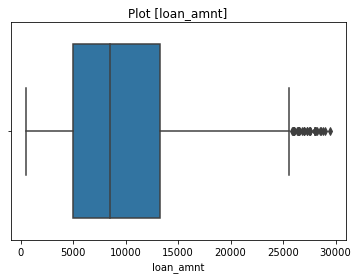

Column Stats:
 count    34565.000000
mean      9698.465210
std       5758.780454
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13250.000000
max      29500.000000
Name: loan_amnt, dtype: float64 

IQR Stats:
 {'quartile1': 5000.0, 'quartile3': 13250.0, 'iqr': 8250.0, 'lower_bound': -7375.0, 'upper_bound': 25625.0} 



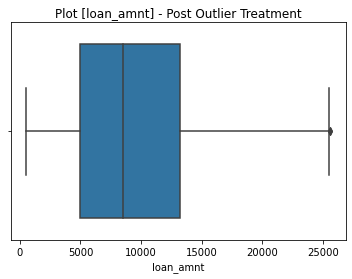

Rows dropped:  47
Percentage rows dropped:  0.14 %


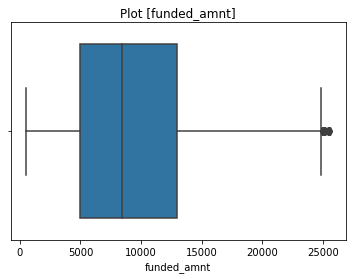

Column Stats:
 count    34518.000000
mean      9462.384118
std       5502.323231
min        500.000000
25%       5000.000000
50%       8400.000000
75%      12950.000000
max      25600.000000
Name: funded_amnt, dtype: float64 

IQR Stats:
 {'quartile1': 5000.0, 'quartile3': 12950.0, 'iqr': 7950.0, 'lower_bound': -6925.0, 'upper_bound': 24875.0} 



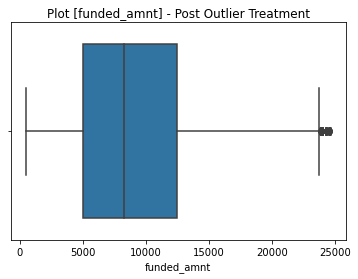

Rows dropped:  373
Percentage rows dropped:  1.08 %


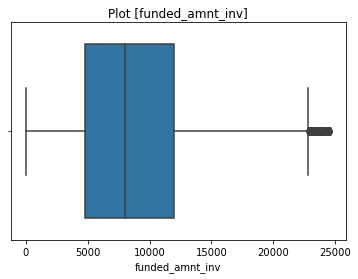

Column Stats:
 count    34145.000000
mean      8813.216347
std       5272.454069
min          0.000000
25%       4800.000000
50%       7998.340000
75%      12000.000000
max      24625.000000
Name: funded_amnt_inv, dtype: float64 

IQR Stats:
 {'quartile1': 4800.0, 'quartile3': 12000.0, 'iqr': 7200.0, 'lower_bound': -6000.0, 'upper_bound': 22800.0} 



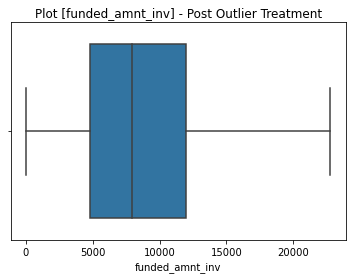

Rows dropped:  250
Percentage rows dropped:  0.73 %


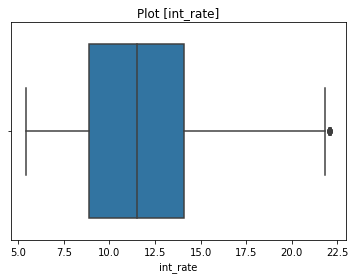

Column Stats:
 count    33895.000000
mean        11.649187
std          3.534046
min          5.420000
25%          8.880000
50%         11.490000
75%         14.090000
max         22.110000
Name: int_rate, dtype: float64 

IQR Stats:
 {'quartile1': 8.88, 'quartile3': 14.09, 'iqr': 5.209999999999999, 'lower_bound': 1.0650000000000022, 'upper_bound': 21.904999999999998} 



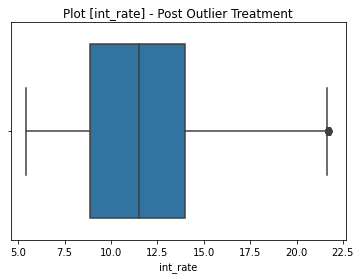

Rows dropped:  28
Percentage rows dropped:  0.08 %


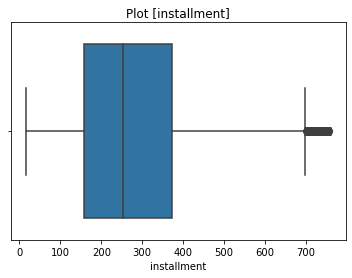

Column Stats:
 count    33867.000000
mean       277.160816
std        155.135669
min         15.690000
25%        156.690000
50%        252.510000
75%        373.220000
max        759.720000
Name: installment, dtype: float64 

IQR Stats:
 {'quartile1': 156.69, 'quartile3': 373.22, 'iqr': 216.53000000000003, 'lower_bound': -168.10500000000008, 'upper_bound': 698.0150000000001} 



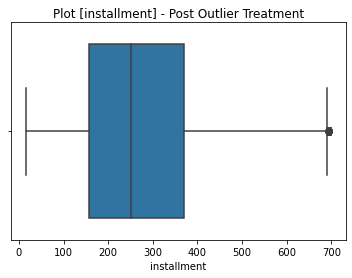

Rows dropped:  252
Percentage rows dropped:  0.74 %


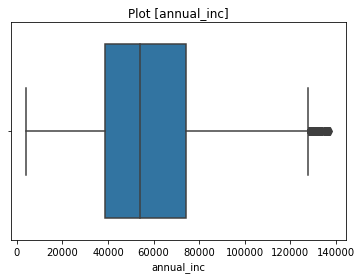

Column Stats:
 count     33615.000000
mean      58259.003701
std       26284.080698
min        4000.000000
25%       38800.000000
50%       54000.000000
75%       74400.000000
max      137481.000000
Name: annual_inc, dtype: float64 

IQR Stats:
 {'quartile1': 38800.0, 'quartile3': 74400.0, 'iqr': 35600.0, 'lower_bound': -14600.0, 'upper_bound': 127800.0} 



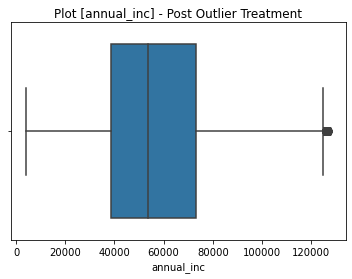

Rows dropped:  384
Percentage rows dropped:  1.14 %


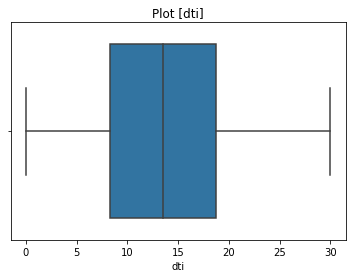

Column Stats:
 count    33231.000000
mean        13.401831
std          6.689095
min          0.000000
25%          8.250000
50%         13.510000
75%         18.720000
max         29.990000
Name: dti, dtype: float64 

IQR Stats:
 {'quartile1': 8.25, 'quartile3': 18.72, 'iqr': 10.469999999999999, 'lower_bound': -7.454999999999998, 'upper_bound': 34.425} 



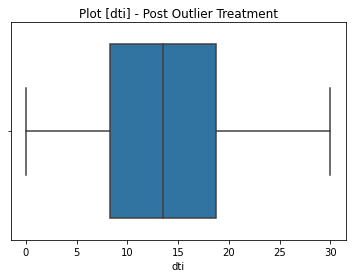

Rows dropped:  0
Percentage rows dropped:  0.0 %


In [449]:
columns_outlier_treat = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti']

for c in columns_outlier_treat:
    loan = treat_outliers(loan, c)

In [433]:
print(loan.shape)

(34565, 21)


In [434]:
# Taking a snapshot post outlier treatment
loan.to_csv('./.data/snapshot.clean.loan.csv') 

## Step 7 - Analysis

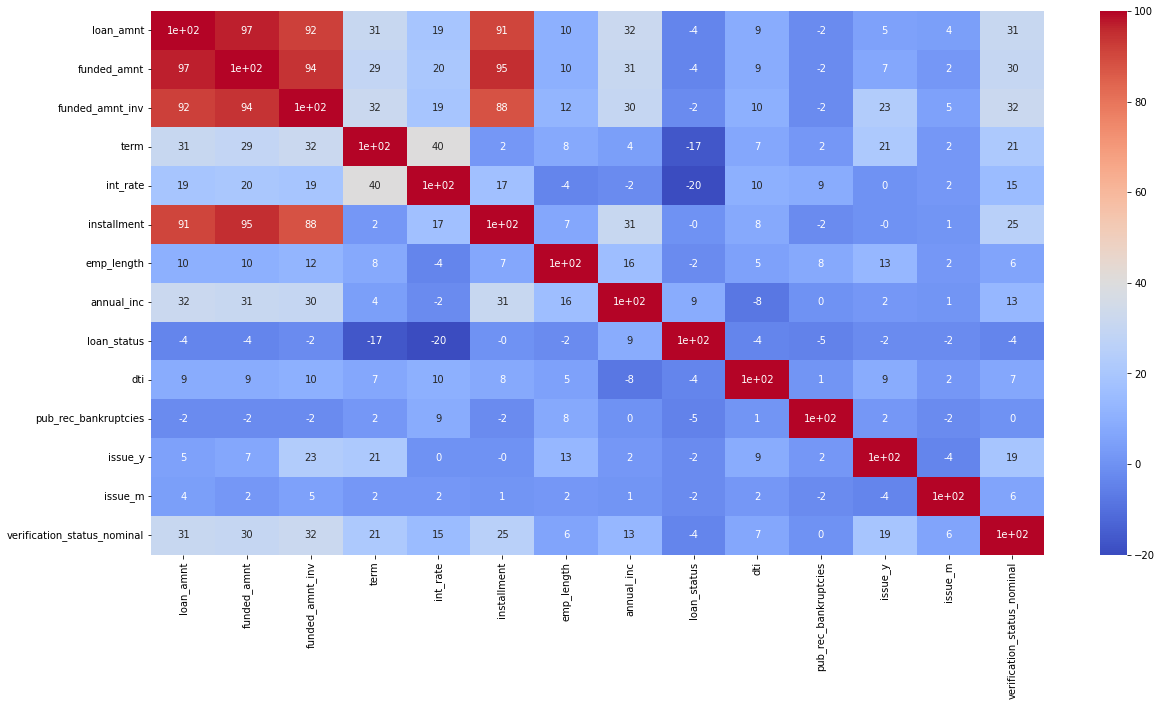

In [457]:
corr = round(loan.corr(),2)*100
plot.figure(figsize=(20, 10))
sea.heatmap(corr, annot = True,  cmap="coolwarm")
plot.show()